# ¿Cómo podemos optimizar los recursos económicos de un club para lograr un rendimiento deportivo superador?

##Cargamos librerías y dataset##





In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     | 17.8 MB 23.6 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 26.7 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357942 sha256=41b4d2d4ef41fd0f90ba1f5e946fef910d85146964b2145d1bde04ec777b1d7c
  Stored in directory: /tmp/pip-ephem-wheel-cache-a5v_tm09/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=

In [ ]:
#Cargamos las librerías
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
### Load relevant packages
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import pandas_profiling
# https://community.plot.ly/t/solved-update-to-plotly-4-0-0-broke-application/26526/2
import os
#%matplotlib inline
#plt.style.use('ggplot')
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
bokeh.io.output_notebook(INLINE)
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.svm import SVC



In [ ]:
#Cargamos el dataset
df = 'https://raw.githubusercontent.com/adrianogennari22/coder/main/FM%202023.csv'
df = pd.read_csv (df)
df.head()

,Name,Position,Age,ca,pa,Nationality,Club,Corners,Crossing,Dribbling,...,World reputation,Race,RCA,Colour of skin,Date of birth,Number of national team appearances,Goals scored for the national team,Salary,Rental club,UID
0,Kevin De Bruyne,M/AM RLC,31,189,189,Belgium,Manchester City,14,19,15,...,9400,Northern_European,181,4,1991/6/28,91,24,394372.0,NaN,18004457
1,Kylian Mbappé,AM/S RL,23,188,197,France,Paris Saint-Germain,13,13,18,...,9248,African_Caribbean,172,13,1998/12/20,57,27,1035616.0,NaN,85139014
2,Robert Lewandowski,S,33,186,190,Poland,Barcelona,3,8,13,...,9250,Northern_European,183,3,1988/8/21,132,76,345204.0,NaN,719601
3,Erling Haaland,S,22,185,195,"Norway,England",Manchester City,7,10,14,...,8750,Northern_European,185,2,2000/7/21,21,20,394372.0,NaN,29179241
4,Mohamed Salah,AM/S RL,30,185,187,Egypt,Liverpool,12,14,17,...,8750,North_African__Middle_Eastern,181,9,1992/6/15,85,47,405971.0,NaN,98028755


## Diccionario de datos ##


### Ficha ###

Name - Nombre

Position- Posición

Age - Edad

ca - Calidad actual

pa - Calidad potencial

Nationality - Nacionalidad

Club -Club


###Atributos técnicos ###
Corners - Ejecución de tiros de esquina

Crossing - Cruce

Dribbling - Regate

Finishing - Finalización de las jugadas

First touch - Primer toque

Free kick taking - Ejecución de pelota parada

Heading - Cabezazo

Long Shots - Pase largo

Long throws - Saque largo

Marking - Marca

Passing - Pase

Penalty Taking - Ejecución de penales

Tackling - Cruce

Technique - Técnica

### Atributos mentales ###

Agression - Agresividad en el cruce

Anticipation - Anticipación

Bravery - Valentía

Composure - Compostura

Concentration - Concentración

Vision - Visión

Decition - Decisión

Determination - Determinación

Flair - Instinto

Leadership - Liderazgo

Off The Ball - Desmarques (movimiento sin pelota)

Position - Colocación

Teamwork - Trabajo en equipo

Work Rate - Lucha

Command Of Area - Liderazgo en el área

Communication - Comunicación

Eccentricity - Exentricidad

Handling - Manejo

Kicking - Fuerza de patada

One On Ones - Mano a mano

Reflexes - Reflexividad

Rushing Out - Salida rápida

Punching - golpe de puño

Throwing - Lanzamiento

Adaptation - Adaptación

Ambition - Ambición

Argue - Argumentación

Loyal - Lealtad

Resistant to stress - resistencia al stress

Professional - Profesionalismo

Sportsmanship - Deportividad

Emotional control - Control emocional


### Atributos físicos ###

Acceleration - Aceleración

Agility	 - Agilidad

Balance - Balance

Jumping - Salto

Reach - Alcance

Natural Fitness – Forma natural

Pace - Paso (ritmo)

Stamina - Resistencia

Strength - Fuerza

Stability - Estabilidad

Foul - Faltas

Contest performance - Desempeño en duelos

Injury - Lesiones

diversity - Diversidad

Aerial Reach - Salto

Height - Altura

Weight - Peso

Left Foot - Manejo de pierna izquierda

Right Foot - Manejo de pierna derecha


###Posiciones###

GK

DL

DC

DR

WBL

WBR

DM

ML

MC

MR

AML

AMC

AMR

ST

###Atributos de mercado###

Values	- Valor

Current reputation - Reputación actual

Domestic reputation - Reputación doméstica

World reputation - Reputación mundial

Number of national team appearances - Apariciones en selección nacional

Goals scored for the national team - Goles en selección nacional

Salary - Salario

Rental club - Club de cesión

##Hipótesis y objetivos##


**Objetivo analítico**
Con la intención de poder predecir cuáles serán los jugadores más demandados en el mercado, los de mayor rendimiento salario/valor o salario/rendimiento deportivo, entrenaremos un algoritmo para aportar soluciones a las demandas específicas.

**Contexto empresarial**
En la actualidad, el fútbol profesional masculino se ha convertido en una de las industrias que generan más ingresos. La FIFA realizó un informe en el que detalla los números que se movieron durante el 1° de junio y el 1° de septiembre de 2023, donde hubo un gasto cercano a los 7360 millones de dólares, posicionándose como el año con más traspasos en la historia. En total se realizaron poco más de 10 mil traspasos entre clubes.
Insertados en ese contexto y sin dejar de tener en cuenta que se trata de un deporte y, como tal, no responde solo a lógicas económicas, el rendimiento en competencia suele conducir a mejores rendimientos económicos.
Buscaremos, entonces, predecir qué buscará el mercado en momentos específicos. Así, podremos lograr mejores resultados económicos y una consiguiente mejora deportiva, siendo las finanzas una de las variables más influyentes en el resultado del deporte.


**Problema comercial**
La tarea es proporcionar visualizaciones para obtener los jugadores que más se acerquen a las características requeridas. Se pueden tener en cuenta variables como presupuesto para fichajes, presupuesto para sueldos, resultados esperados, necesidad de una posición particular, relación entre jugadores dentro del plantel en base a atributos mentales, etc.
De acuerdo al objetivo en la temporada (potenciar el plantel, obtener rendimientos económicos a mediano o largo plazo, etc) se deben presentar visualizaciones que respondan a las demandas.   

**Contexto analítico**
Contamos con un dataset tiene un registro de gran cantidad de jugadores de fútbol en actividad a nivel mundial, con descriptores de las características físicas y psicológicas relevantes y valoraciones de atributos técnicos indispensables para el deporte. Al tratarse de datos subjetivos, debemos tener en cuenta que las valoraciones dependen de la experiencia y observaciones particulares de los ojeadores. Forma parte de la base de datos del juego de PC Football Manager 2023, lanzado a fines de 2022, por lo que los atributos y valores están expresados teniendo en cuenta esa realidad.




**Descripción del dataset**
El dataset tiene un registro de gran cantidad de jugadores de fútbol en actividad a nivel mundial, con descriptores de las características físicas y psicológicas relevantes y valoraciones de atributos técnicos indispensables para el deporte. Al tratarse de datos subjetivos, debemos tener en cuenta que las valoraciones dependen de la experiencia y observaciones particulares de los ojeadores. Forma parte de la base de datos del juego de PC Football Manager 2023, lanzado a fines de 2022, por lo que los atributos y valores están expresados teniendo en cuenta esa realidad.  

**Hipótesis/preguntas**
¿Cómo podemos optimizar los recursos económicos destinados a afrontar la temporada? El presupuesto anual influirá mucho en el rendimiento del equipo en las competiciones, por lo que un error en la conformación de la plantilla puede repercutir en el desempeño.
La idea es poder reducir el margen de error que supone toda práctica deportiva y sus problemas a resolver a lo largo de la competencia, pudiendo suponer el éxito de un mercado de pases con un análisis de datos disponibles. Entonces, podemos responder preguntas como las siguientes, entre muchas otras:
¿Es necesario contratar jugadores con más experiencia?
¿A qué costo podemos contratar promesas?
¿Qué jugadores son los más viables de transferir, teniendo en cuenta la ganancia del fichaje, la calidad que se perdería y la reducción de carga salarial?

**Objetivo y alcance**
El objetivo es poder predecir rendimiento de un plantel, teniendo en cuenta su conformación, así como poder elegir mejores tácticas para aprovechamiento de las características. Por otro lado, como herramienta para gestión deportiva, podremos buscar los jugadores que mejor se adapten a las necesidades del cuerpo técnico o una futura promesa, pudiendo filtrar por recursos, nivel esperado o inicial de temporada. Además, podremos conformar una plantilla que sea compatible hacia adentro teniendo en cuenta indicadores de personalidad o psicológicos.




##**Mostramos algunos datos con gráficos**##

Usaremos herramientas gráficas para analizar el mercado, a la hora de buscar reforzar el plantel, vender jugadores o adecuar los salarios de la plantilla. Por un lado, vemos cómo la edad de los jugadores parece explicar los salarios. Así, un jugador entre los 25 y los 30 años alcanzará su pico salarial y repercutirá en la erogación de dinero que se deberá hacer para contratar a un refuerzo. En el segundo gráfico vemos cómo influye la calidad (actual y esperada) de un jugador en su valor de compra/venta. El gráfico muestra que existe una correlación entre la calidad y el costo del fichaje, así como también la menor predicción del método a la hora de buscar contratar en base a la expectativa, encontrándose una mayor dispersión.

Text(0, 0.5, 'Salario')

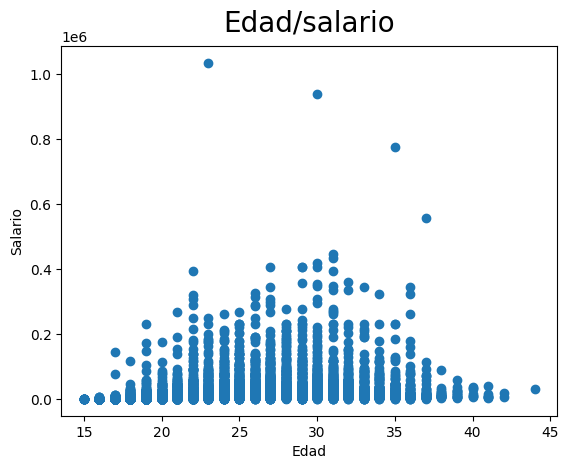

In [ ]:
plt.scatter(df ['Age'],df ['Salary'])
plt.title("Edad/salario", fontsize=20, verticalalignment='bottom')
plt.xlabel("Edad")
plt.ylabel("Salario")

¿Hay una relación entre edad y salario?
Podemos visualizar una relación entre la edad de los futbolistas y su salario. Tener una plantilla con jugadores con una edad de entre 25 y 30 años repercutirá en un mayor gasto en salarios.  


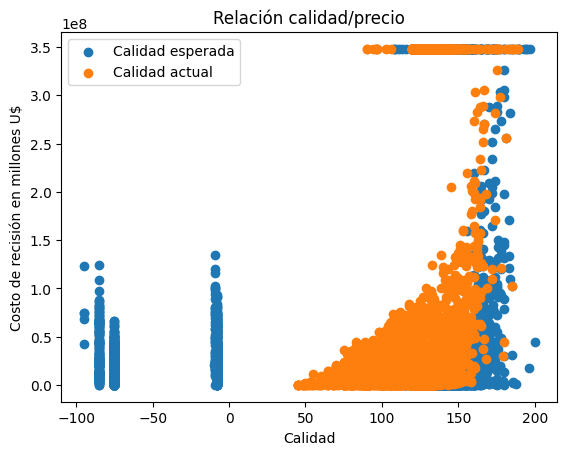

In [ ]:
plt.scatter(df['pa'],df ['Values'], label='Calidad esperada')
plt.scatter(df['ca'],df ['Values'], label='Calidad actual')
plt.xlabel('Calidad')
plt.ylabel('Costo de recisión en millones U$')
plt.title('Relación calidad/precio')
plt.legend()
plt.show()

Repercute el momento de la carrera de un jugador (calidad actual) en su valuación?
Vemos que a medida que aumentan la calidad esperada y actual hay un crecimiento en el coste inicial, lo que indica que el mercado está equilibrado.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


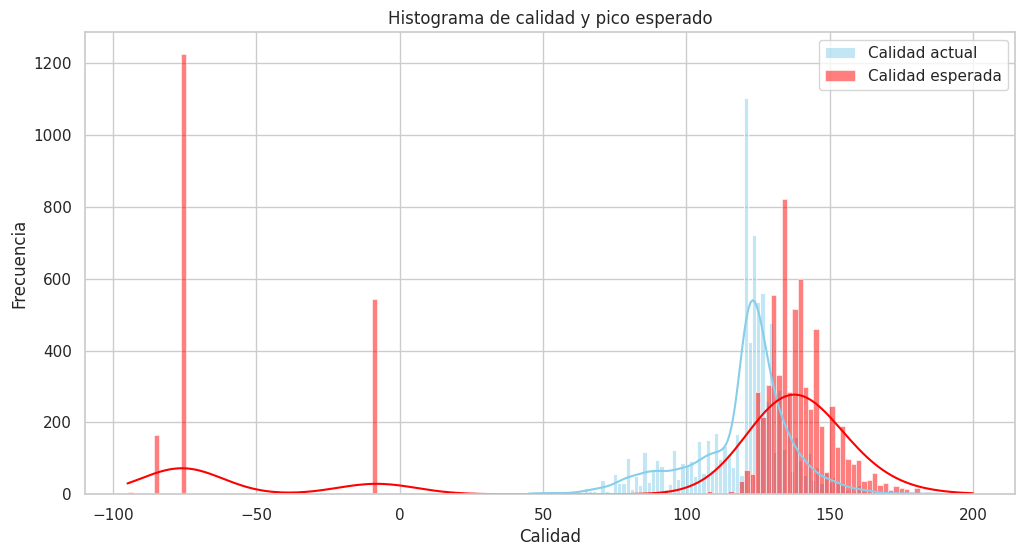

In [ ]:
# Selección del estilo
sns.set(style="whitegrid")

# Histograma para ca y pa
plt.figure(figsize=(12, 6))
sns.histplot(df['ca'], color="skyblue", label="Calidad actual", kde=True)
sns.histplot(df['pa'], color="red", label="Calidad esperada", kde=True)

# Agregando títulos y etiquetas
plt.title('Histograma de calidad y pico esperado')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

##Limpiamos de nulos nuestro dataset y realizamos forward selection##

In [ ]:
def nulos(df):
  cant= len(df)
  for col in df.columns:
       print (col, ':', round(df[col].isnull().sum() *100 / cant, 2), '%')

nulos(df)

Name : 0.0 %
Position : 0.0 %
Age : 0.0 %
ca : 0.0 %
pa : 0.0 %
Nationality : 0.0 %
Club : 1.27 %
Corners : 0.0 %
Crossing : 0.0 %
Dribbling : 0.0 %
Finishing : 0.0 %
First Touch : 0.0 %
Free Kick Taking : 0.0 %
Heading : 0.0 %
Long Shots : 0.0 %
Long Throws : 0.0 %
Marking : 0.0 %
Passing : 0.0 %
Penalty Taking : 0.0 %
Tackling : 0.0 %
Technique : 0.0 %
Aggressiion : 0.0 %
Anticipation : 0.0 %
Bravery : 0.0 %
Composure : 0.0 %
Concentration : 0.0 %
Vision : 0.0 %
Decision : 0.0 %
Determination : 0.0 %
Flair : 0.0 %
Leadership : 0.0 %
Off The Ball : 0.0 %
Position.1 : 0.0 %
Teamwork : 0.0 %
Work Rate : 0.0 %
Acceleration : 0.0 %
Agility : 0.0 %
Balance : 0.0 %
Jumping Reach : 0.0 %
Natural Fitness : 0.0 %
Pace : 0.0 %
Stamina : 0.0 %
Strength : 0.0 %
Stability : 0.0 %
Foul : 0.0 %
Contest performance : 0.0 %
Injury : 0.0 %
diversity : 0.0 %
Aerial Reach : 0.0 %
Command Of Area : 0.0 %
Communication : 0.0 %
Eccentricity : 0.0 %
Handling : 0.0 %
Kicking : 0.0 %
One On Ones : 0.0 %
Reflex

In [ ]:
df= df.dropna()
df

,Name,Position,Age,ca,pa,Nationality,Club,Corners,Crossing,Dribbling,...,World reputation,Race,RCA,Colour of skin,Date of birth,Number of national team appearances,Goals scored for the national team,Salary,Rental club,UID
56,Romelu Lukaku,S,29,162,176,"Belgium,Democratic Republic of Congo",Chelsea,4,10,13,...,7984,African_Caribbean,161,17,1993/5/13,102,68,405971.0,FC Internazionale Milano,18007344
157,Dejan Kulusevski,M/AM RC,22,153,171,"Sweden,North Macedonia",Juventus,11,14,16,...,6850,Northern_European,153,2,2000/4/25,25,2,88941.0,Tottenham Hotspur,43295814
175,Georginio Wijnaldum,DM/M/AM LC,31,153,161,"Holland,Suriname",Paris Saint-Germain,8,12,15,...,6500,African_Caribbean,148,16,1990/11/11,85,26,210959.0,Associazione Sportiva Roma,859612
211,Lucas Ocampos,AM RL,28,152,155,"Argentina,Spain",Sevilla,10,12,16,...,5995,Mediterranean_Hispanic,150,3,1994/7/11,10,2,29897.0,AFC Ajax,14031132
217,Arkadiusz Milik,S,28,151,160,Poland,Olympique de Marseille,10,10,12,...,6800,Northern_European,152,5,1994/2/28,62,16,75941.0,Juventus,96026541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8110,Tony Weston,S,18,80,-75,England,Rangers,8,8,8,...,2001,Northern_European,74,3,2003/9/17,0,0,1392.0,Partick Thistle,29235374
8127,Stevanato,M/AM C,18,80,-75,Brazil,SPO,4,6,8,...,50,Mediterranean_Hispanic,70,6,2003/9/15,0,0,94.0,AMG,2000140948
8263,Dagoberto Espinoza,DM C,18,75,-75,Mexico,CF América,5,5,6,...,1004,Mediterranean_Hispanic,73,1,2004/4/17,0,0,675.0,KSV Cercle Brugge,2000162928
8363,Yassine Khalifi,DM/M C,16,70,-75,Morocco,Académie Mohammed VI de Football,9,7,10,...,746,North_African__Middle_Eastern,73,255,2005/8/9,0,0,0.0,Union Sportive de Touarga,2000213637


In [ ]:
df_numericos =df.select_dtypes (include=[np.number])
df_numericos

,Age,ca,pa,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,...,Values,Current reputation,Domestic reputation,World reputation,RCA,Colour of skin,Number of national team appearances,Goals scored for the national team,Salary,UID
56,29,162,176,4,10,13,18,13,11,15,...,142679281,8150,8982,7984,161,17,102,68,405971.0,18007344
157,22,153,171,11,14,16,13,15,9,7,...,35000000,7650,7250,6850,153,2,25,2,88941.0,43295814
175,31,153,161,8,12,15,12,16,6,12,...,35367495,7650,8000,6500,148,16,85,26,210959.0,859612
211,28,152,155,10,12,16,15,14,9,13,...,49692502,7595,7595,5995,150,3,10,2,29897.0,14031132
217,28,151,160,10,10,12,16,15,15,15,...,53670146,7550,7850,6800,152,5,62,16,75941.0,96026541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8110,18,80,-75,8,8,8,14,9,6,6,...,17894625,3993,3995,2001,74,3,0,0,1392.0,29235374
8127,18,80,-75,4,6,8,13,13,6,6,...,542956,4000,4000,50,70,6,0,0,94.0,2000140948
8263,18,75,-75,5,5,6,5,10,5,6,...,4148014,4696,4400,1004,73,1,0,0,675.0,2000162928
8363,16,70,-75,9,7,10,10,11,9,8,...,18656,3491,3491,746,73,255,0,0,0.0,2000213637


In [ ]:
import statsmodels.api as sm
def forward_selection(x, y, significance_level=0.01):
    initial_features = df_numericos.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(y, sm.add_constant(df_numericos[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

## Intentemos explicar si el valor de mercado de un jugador puede explicarse por su reputación (Spoiler, creo que el mercado del fútbol pondera muchas otras variables y se rige por modas y búsqueda de rédito económico extradeportivo)##

In [ ]:
y=df["Values"].values
y


array([142679281,  35000000,  35367495,  49692502,  53670146,  40613652,
        25253317,  37258394,  28214999,  71914876,   2361385,  16647882,
        54284132,  25000000,  15000000,  23700000,   7979705,  34710527,
        24619394,  15657934,  11511005,  44210250,  11770090,   9765282,
        32727068,  71914876,  11938062,  15988499,  19060367,  13468949,
        17203734,  27507440,  16078634,  24881967,   7325905,  35991161,
         6945202,   9636219,  33405620,   7048614,  12410833,  24420000,
         9869723,  12724386,  56140000,  13740001,  10557494,  16236262,
        29797572,   9513120,   7972902,   7705391,  16363534,  17798932,
        27999999,   5145562,  43061932,   9060929,   3576621,   4423330,
        12931966,  65175826,   8488460,  12770906,  32361694,   1624188,
        19062192,  20000000,  12614352,   4111059,  63300000,  26620103,
        11099860,   2731452,  22350000,   2309130,   8636080,   3608549,
        40484159,  11563463,    349999,  10962000, 

La reputación es nuestra variable independiente.

In [ ]:
reputacion_actual=df[['Current reputation'] ]
reputacion_actual=reputacion_actual.dropna()
x=reputacion_actual.values
x

array([[8150],
       [7650],
       [7650],
       [7595],
       [7550],
       [7700],
       [7248],
       [7450],
       [7450],
       [7400],
       [7350],
       [7300],
       [7300],
       [7298],
       [7250],
       [7250],
       [7250],
       [7250],
       [7250],
       [7242],
       [7150],
       [7150],
       [7146],
       [7150],
       [7150],
       [7100],
       [7099],
       [7100],
       [7100],
       [7050],
       [7050],
       [7050],
       [7000],
       [7089],
       [6600],
       [6995],
       [7000],
       [6750],
       [7000],
       [7000],
       [7000],
       [6995],
       [6950],
       [6550],
       [7100],
       [6950],
       [6900],
       [6893],
       [6875],
       [6900],
       [6900],
       [6823],
       [6900],
       [7050],
       [6850],
       [6844],
       [7000],
       [6845],
       [6840],
       [6846],
       [6900],
       [7500],
       [6850],
       [6850],
       [6800],
       [6800],
       [68

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
from sklearn.linear_model import LinearRegression
# crear el modelo
lr = LinearRegression()
# Ajustar el modelo con X_train y y_train
lr.fit(X_train,y_train)
# PRedecir con X_test
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 11764814.774914632


In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 266476582878342.28


In [ ]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 16324110.477399444


In [ ]:
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE 16.608153743274656


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

-0.016192558301794335


Este coeficiente de determinación nos muestra que muy poco de la reputación de un jugador en la actualidad explica su valor, lo qu eindica que hay otras variables que tienen más peso, o bien hay mercados que no responden totalmente a la lógica. Seguiremos examinando el dataset para lograr nuevos acercamientos.
En cuanto a la desviación cuadrática media, podemos llegar a las mismas conclusiones

Probemos qué pasa si usamos la reputación mundial y no la reputación actual.

In [ ]:
reputacion_mundial=df[['World reputation'] ]
reputacion_mundial=reputacion_mundial.dropna()
rm=reputacion_mundial.values
rm

array([[7984],
       [6850],
       [6500],
       [5995],
       [6800],
       [7000],
       [5998],
       [6500],
       [6750],
       [6250],
       [6500],
       [5750],
       [6500],
       [5698],
       [6500],
       [5870],
       [6250],
       [6250],
       [7262],
       [6492],
       [6250],
       [5750],
       [5746],
       [5500],
       [6350],
       [5000],
       [6184],
       [6200],
       [5750],
       [5950],
       [5550],
       [6250],
       [5000],
       [5989],
       [5250],
       [5654],
       [5750],
       [6000],
       [6700],
       [6000],
       [6000],
       [5995],
       [5750],
       [5750],
       [7000],
       [5226],
       [5500],
       [5743],
       [4997],
       [5500],
       [5300],
       [4028],
       [5500],
       [6250],
       [5800],
       [5351],
       [5750],
       [4249],
       [5240],
       [6246],
       [5250],
       [6000],
       [6100],
       [4700],
       [5000],
       [6700],
       [57

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(rm,y,test_size=0.2,random_state=2)
from sklearn.linear_model import LinearRegression
# crear el modelo
lr = LinearRegression()
# Ajustar el modelo con X_train y y_train
lr.fit(X_train,y_train)
# PRedecir con X_test
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

-0.010213381858371173


Vemos que hay diferencias, pero no son significativas. A partir de estas pruebas, podemos inferir que el valor de mercado de los futbolistas no se explica por su reputación, si no que tiene que ver con variables extrafutbolísticas (presencia en redes sociales, publicidad, contratos de televisación)

##Data Wrangling.

Comenzamos a limpiar el dataset de valores nulos, erróneos o irrelevantes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 56 to 8428
Data columns (total 98 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Name                                 995 non-null    object 
 1   Position                             995 non-null    object 
 2   Age                                  995 non-null    int64  
 3   ca                                   995 non-null    int64  
 4   pa                                   995 non-null    int64  
 5   Nationality                          995 non-null    object 
 6   Club                                 995 non-null    object 
 7   Corners                              995 non-null    int64  
 8   Crossing                             995 non-null    int64  
 9   Dribbling                            995 non-null    int64  
 10  Finishing                            995 non-null    int64  
 11  First Touch                        

In [ ]:
#Veamos si hay datos duplicados
print(df.shape)
train= df.drop_duplicates()
print(df.shape)

(995, 98)
(995, 98)


In [ ]:
# Columnas con porcentaje de nulos
pd.set_option('display.max_rows', None)  # or 1000
serie=(df.isnull().sum()/df.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

Series([], dtype: float64)

In [ ]:
pip install missingno

<Axes: >

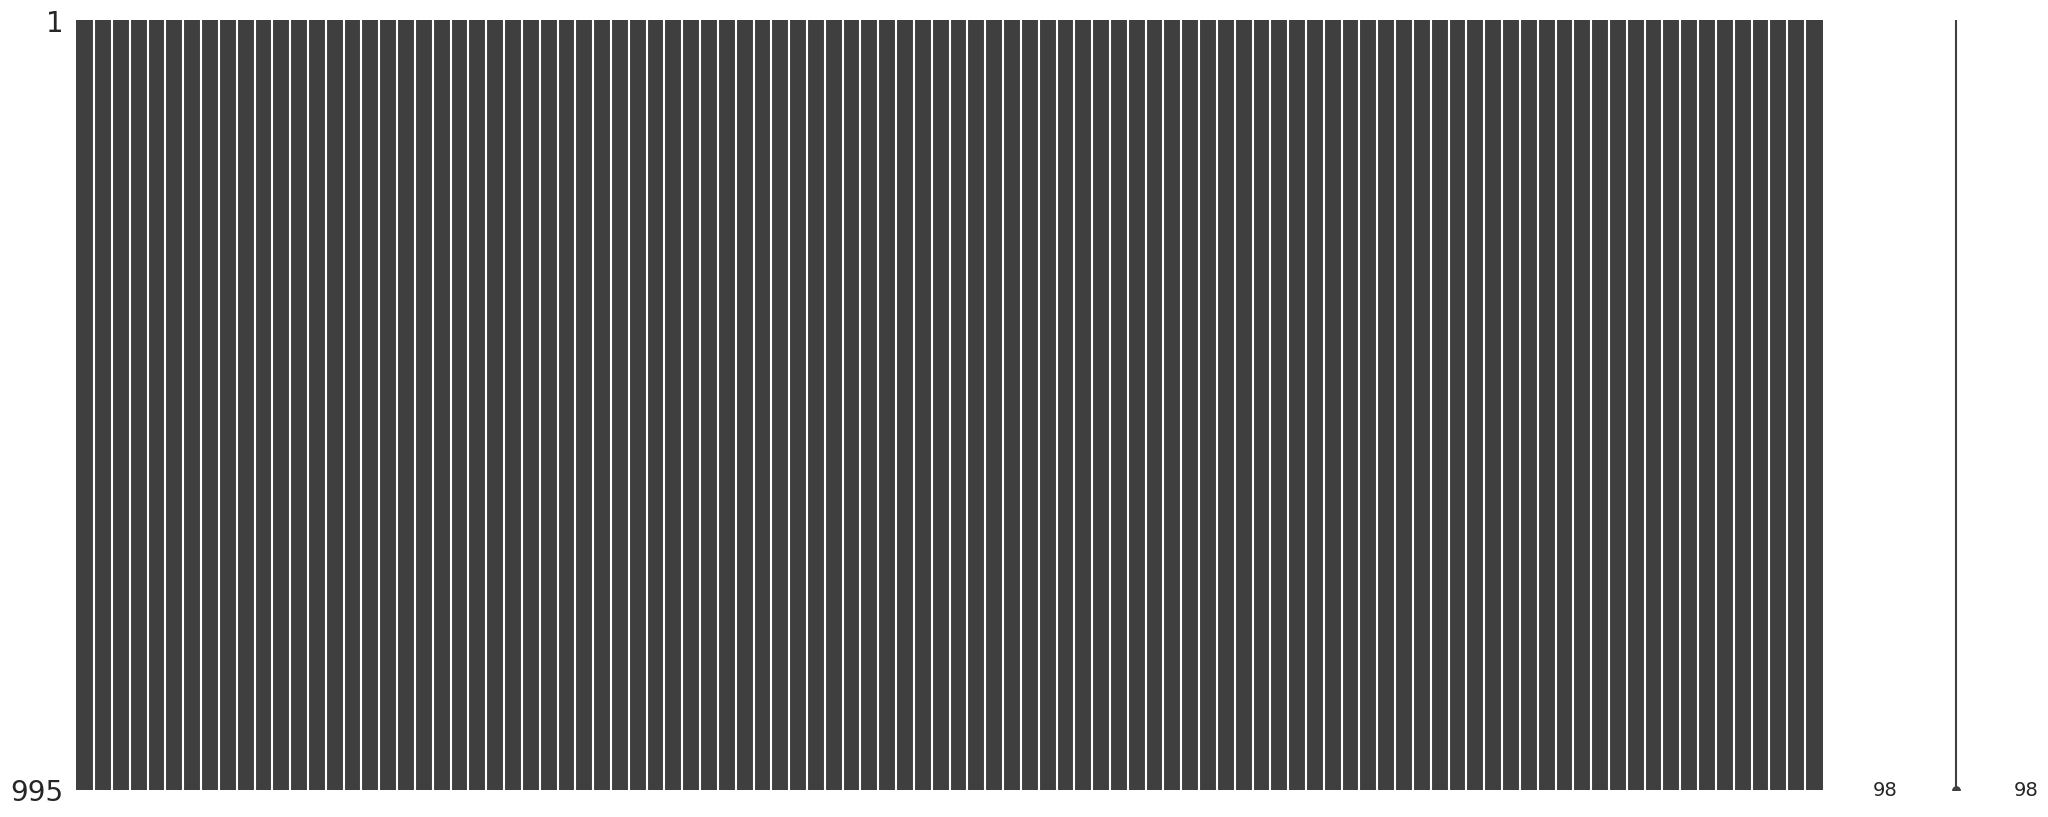

In [ ]:
import missingno as msno
msno.matrix(df)

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

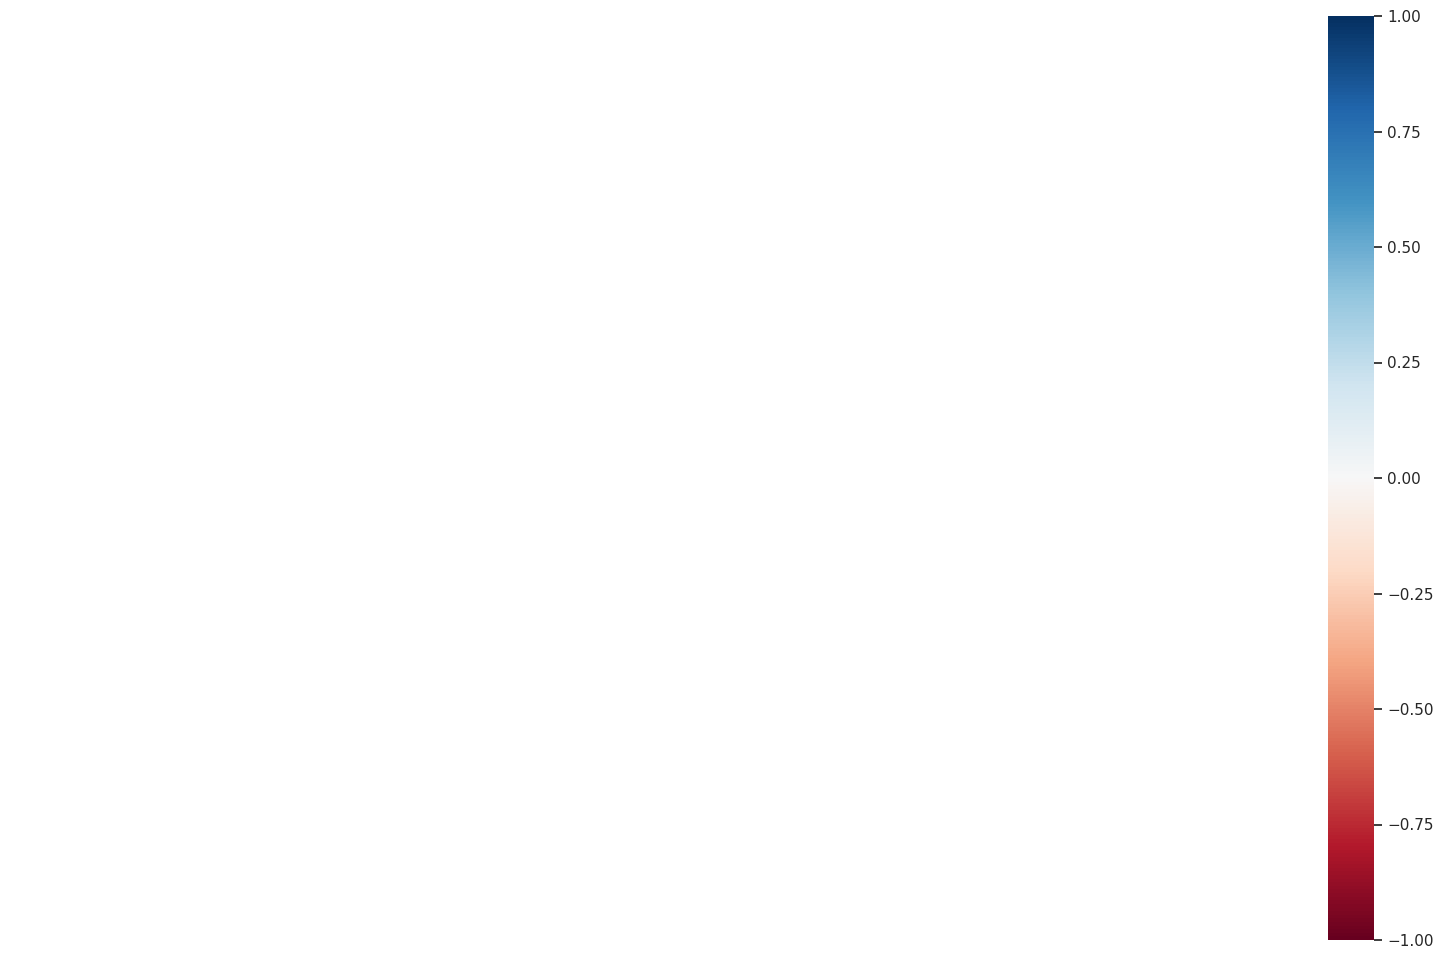

In [ ]:
msno.heatmap(df)

In [ ]:
# Obtener las columnas de tipo 'object'
columnas_object = df.select_dtypes(include=['object']).columns
print (columnas_object)

Index(['Name', 'Position', 'Nationality', 'Club', 'Race', 'Date of birth',
       'Rental club'],
      dtype='object')


In [ ]:
# Obtener las columnas numéricas de tipo 'int64'
columnas_int64 = df.select_dtypes(include=['int64']).columns
print (columnas_int64)

Index(['Age', 'ca', 'pa', 'Corners', 'Crossing', 'Dribbling', 'Finishing',
       'First Touch', 'Free Kick Taking', 'Heading', 'Long Shots',
       'Long Throws', 'Marking', 'Passing', 'Penalty Taking', 'Tackling',
       'Technique', 'Aggressiion', 'Anticipation', 'Bravery', 'Composure',
       'Concentration', 'Vision', 'Decision', 'Determination', 'Flair',
       'Leadership', 'Off The Ball', 'Position.1', 'Teamwork', 'Work Rate',
       'Acceleration', 'Agility', 'Balance', 'Jumping Reach',
       'Natural Fitness', 'Pace', 'Stamina', 'Strength', 'Stability', 'Foul',
       'Contest performance', 'Injury', 'diversity', 'Aerial Reach',
       'Command Of Area', 'Communication', 'Eccentricity', 'Handling',
       'Kicking', 'One On Ones', 'Reflexes', 'Rushing Out', 'Punching',
       'Throwing', 'Adaptation', 'Ambition', 'Argue', 'Loyal',
       'Resistant to stress', 'Professional', 'Sportsmanship',
       'Emotional control', 'GK', 'DL', 'DC', 'DR', 'WBL', 'WBR', 'DM', 'ML',
     

In [ ]:
#Entre las columnas tipo object, encontramos algunas no relevantes para nuestra búsqueda.
#columnas_a_eliminar = ['Race', 'RCA', 'Colour of skin' ] # Columnas a borrar que no aportan
df = df.drop(columns=['Race', 'RCA', 'Colour of skin'])

In [ ]:
#Convertimos la fecha de nacimiento en un dato datetime.
df['Date of birth'] = pd.to_datetime(df['Date of birth'])


Notamos que la columna 'Position' puede contener más de una posición, lo que complejiza la búsqueda. Generamos un nuevo df con las posiciones separadas y concatenamos.

In [ ]:
df_nuevo = df['Position'].str.split('/', expand=True)

In [ ]:
#¿Cuántas columnas nuevas se generaron?
df_nuevo.shape

(995, 4)

In [ ]:
#Renombramos las nuevas columnas
df_nuevo.columns=('Position1', 'Position2', 'Position3', 'Position4')

In [ ]:
#Concatenamos el df original y el nuevo con las columnas separadas.
con_posiciones = pd.concat([df, df_nuevo], axis=1)

In [ ]:
con_posiciones.head()

,Name,Position,Age,ca,pa,Nationality,Club,Corners,Crossing,Dribbling,...,Date of birth,Number of national team appearances,Goals scored for the national team,Salary,Rental club,UID,Position1,Position2,Position3,Position4
56,Romelu Lukaku,S,29,162,176,"Belgium,Democratic Republic of Congo",Chelsea,4,10,13,...,1993-05-13,102,68,405971.0,FC Internazionale Milano,18007344,S,None,None,None
157,Dejan Kulusevski,M/AM RC,22,153,171,"Sweden,North Macedonia",Juventus,11,14,16,...,2000-04-25,25,2,88941.0,Tottenham Hotspur,43295814,M,AM RC,None,None
175,Georginio Wijnaldum,DM/M/AM LC,31,153,161,"Holland,Suriname",Paris Saint-Germain,8,12,15,...,1990-11-11,85,26,210959.0,Associazione Sportiva Roma,859612,DM,M,AM LC,None
211,Lucas Ocampos,AM RL,28,152,155,"Argentina,Spain",Sevilla,10,12,16,...,1994-07-11,10,2,29897.0,AFC Ajax,14031132,AM RL,None,None,None
217,Arkadiusz Milik,S,28,151,160,Poland,Olympique de Marseille,10,10,12,...,1994-02-28,62,16,75941.0,Juventus,96026541,S,None,None,None


Las posiciones atribuidas a cada jugador tienden a generar problemas en el dataset. Eliminemos las columnas de posición, luego usaremos los atributos por posición para agruparlos.

In [ ]:
df = con_posiciones.drop(columns=['Position','Position.1', 'Position1', 'Position2', 'Position3', 'Position4'])

In [ ]:
df.head()

,Name,Age,ca,pa,Nationality,Club,Corners,Crossing,Dribbling,Finishing,...,Values,Current reputation,Domestic reputation,World reputation,Date of birth,Number of national team appearances,Goals scored for the national team,Salary,Rental club,UID
56,Romelu Lukaku,29,162,176,"Belgium,Democratic Republic of Congo",Chelsea,4,10,13,18,...,142679281,8150,8982,7984,1993-05-13,102,68,405971.0,FC Internazionale Milano,18007344
157,Dejan Kulusevski,22,153,171,"Sweden,North Macedonia",Juventus,11,14,16,13,...,35000000,7650,7250,6850,2000-04-25,25,2,88941.0,Tottenham Hotspur,43295814
175,Georginio Wijnaldum,31,153,161,"Holland,Suriname",Paris Saint-Germain,8,12,15,12,...,35367495,7650,8000,6500,1990-11-11,85,26,210959.0,Associazione Sportiva Roma,859612
211,Lucas Ocampos,28,152,155,"Argentina,Spain",Sevilla,10,12,16,15,...,49692502,7595,7595,5995,1994-07-11,10,2,29897.0,AFC Ajax,14031132
217,Arkadiusz Milik,28,151,160,Poland,Olympique de Marseille,10,10,12,16,...,53670146,7550,7850,6800,1994-02-28,62,16,75941.0,Juventus,96026541


##Feature Selection, clusterización y algunas predicciones útiles



Busquemos qué características hacen que un jugador ocupe la posición de, supongamos, marcador central (DC en el dataframe, recordemos) Luego, hagamos una clusterización siguiendo esas características.

In [ ]:
columnas_deseadas = ['Concentration', 'Vision', 'Decision', 'Determination', 'Flair', 'Leadership', 'Command Of Area', 'Communication', 'DC']
caracteristicas_DC = df[columnas_deseadas]

In [ ]:
X = caracteristicas_DC.drop(columns=['DC'])  # Características (todo excepto la columna que deseas predecir)
y = caracteristicas_DC['DC']  # Etiquetas (la columna que deseas predecir)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Dimensiones del conjunto de entrenamiento (X_train, y_train):", X_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba (X_test, y_test):", X_test.shape, y_test.shape)

Dimensiones del conjunto de entrenamiento (X_train, y_train): (796, 8) (796,)
Dimensiones del conjunto de prueba (X_test, y_test): (199, 8) (199,)


In [ ]:
X_train

,Concentration,Vision,Decision,Determination,Flair,Leadership,Command Of Area,Communication
7245,12,9,12,12,6,8,1,4
7336,8,13,11,16,14,8,2,1
7809,9,10,9,14,14,7,3,3
6500,12,11,12,14,10,11,3,1
7253,13,11,11,12,10,10,2,1
2884,8,11,9,13,15,9,2,2
3399,13,15,12,15,14,11,3,1
4156,11,13,10,13,14,12,2,3
3369,12,10,12,14,10,11,3,2
874,12,14,15,13,16,9,3,2


In [ ]:
X_test

,Concentration,Vision,Decision,Determination,Flair,Leadership,Command Of Area,Communication
7282,11,13,11,11,12,8,2,3
5328,11,8,11,9,1,12,11,8
5597,10,12,12,16,13,8,2,3
6129,11,10,12,13,12,9,3,2
6009,9,12,12,16,14,8,3,3
4580,12,10,12,12,8,11,4,3
6948,10,11,10,13,14,7,2,1
6320,13,11,12,12,10,12,4,2
2244,11,14,13,12,13,7,1,2
5913,9,13,10,15,17,7,2,2


In [ ]:
# Creación del modelo SVM
modelo = SVC(C=0.0000001,kernel='sigmoid',random_state=42)

In [ ]:
modelo.fit(X_train, y_train)

SVC(C=1e-07, kernel='sigmoid', random_state=42)

In [ ]:
#Predicciones!
#y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

In [ ]:
X_test.shape

(199, 8)

In [ ]:
y_test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [ ]:
y_test

7282     1
5328     1
5597     1
6129    13
6009     1
4580    12
6948     1
6320    20
2244     1
5913     1
7005     1
4699     1
6891    15
5771    20
1130     1
4029     1
6342     1
1784    20
2015    20
3325     1
6952    20
3559     1
6477     1
1055     1
3863     1
3893    10
1477     1
3129     1
6780     1
1804     1
2316     1
6375     1
6254     1
7446     1
3457    20
6702    17
3458     1
6075    13
7784     1
3568     1
948      1
3391     1
5997     1
5967     1
4016    20
508      1
605      1
6466     1
331     20
5166     1
6411     1
5884     1
6680    11
5473    19
5972     1
3705    20
2827     1
5842     1
2472    20
4584     1
3932     1
5367     1
4346     1
1415    20
5801     1
6356     1
6795     1
2816    12
3522     1
6188     1
7418     1
714     10
2590     1
4923     1
7391     1
987      8
7333     1
999      1
7080    20
4931     1
2136    18
3550     1
6246     1
3931     1
5793     1
2611     7
6667     1
3360     1
1333     1
963      1
7202     1

In [ ]:
#Calculo el accuracy en Test
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.7286432160804021


In [ ]:
#Podríamos suponer a priori que la aptitud de un jugador en liderazgo determinará su aptitud como marcador central, grafiquemos esta hipótesis.
df [['Determination','DC']].values

array([[18,  1],
       [15,  1],
       [15,  1],
       ...,
       [14,  1],
       [ 8,  1],
       [ 6,  1]])

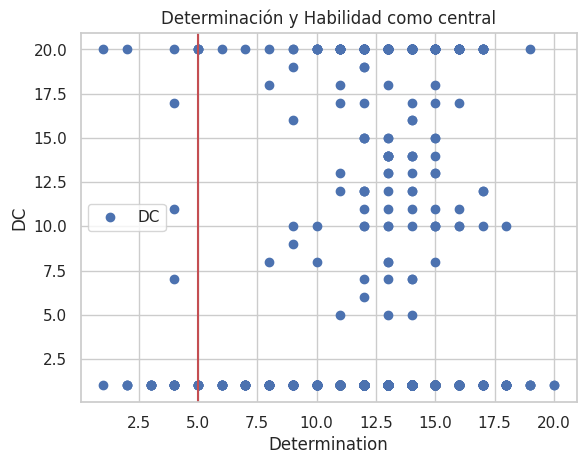

In [ ]:
df.plot(x='Determination', y='DC', style="o")
plt.title('Determinación y Habilidad como central')
plt.xlabel('Determination')
plt.ylabel('DC')
plt.axvline(x=5,color='r')
plt.show()

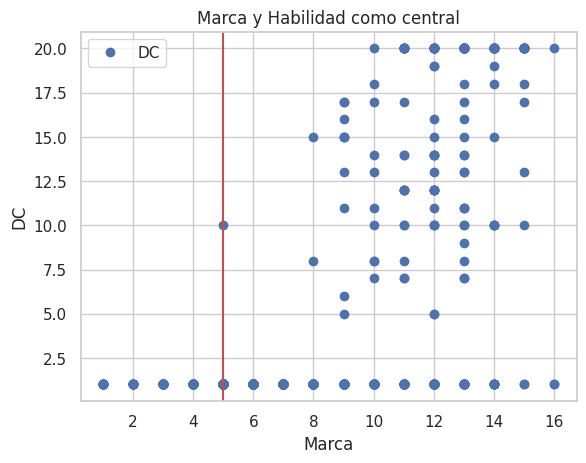

In [ ]:
df.plot(x='Marking', y='DC', style="o")
plt.title('Marca y Habilidad como central')
plt.xlabel('Marca')
plt.ylabel('DC')
plt.axvline(x=5,color='r')
plt.show()

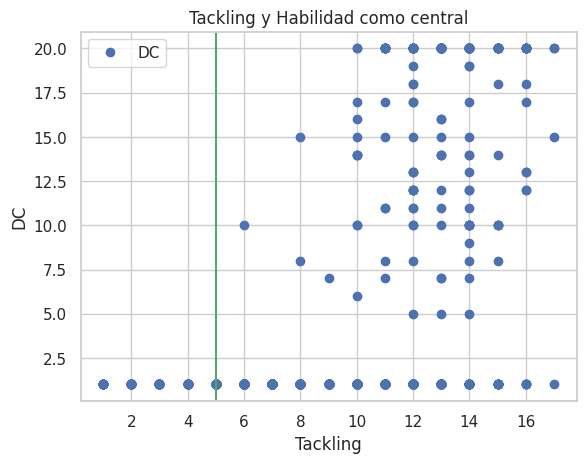

In [ ]:
df.plot(x='Tackling', y='DC', style="o")
plt.title('Tackling y Habilidad como central')
plt.xlabel('Tackling')
plt.ylabel('DC')
plt.axvline(x=5,color='g')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


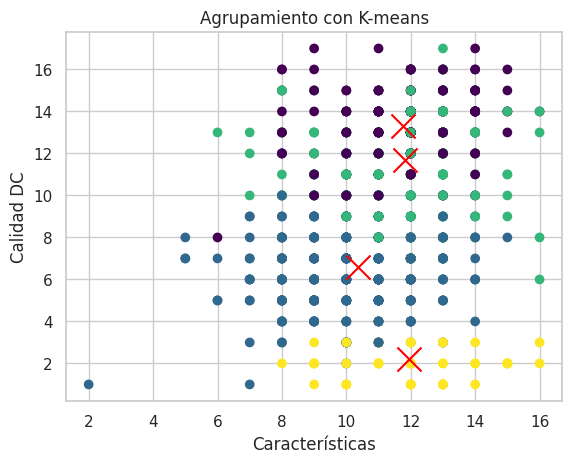

In [ ]:

# Extraer las características (features) del DataFrame
X = df[['Concentration','Tackling', 'Decision', 'Determination', 'Flair', 'Leadership', 'Command Of Area', 'Communication', 'Marking', 'DC']].values

# Especificar el número de clusters (K)
n_clusters = 4

# Crear un objeto KMeans
kmeans = KMeans(n_clusters=n_clusters)

# Ajustar el modelo a los datos
kmeans.fit(X)

# Obtener las etiquetas de los clusters y los centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualizar los datos agrupados
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=300, c='red')
plt.title('Agrupamiento con K-means')
plt.xlabel('Características')
plt.ylabel('Calidad DC')
plt.show()
df_clustered = df.copy()  # Copiar el DataFrame original
df_clustered['cluster_label'] = labels


##Data Storytelling

Veamos algunas medidas estadísticas de variables relevantes y visualicemos correlaciones.


In [ ]:
df [['ca','pa','Age', 'Values', 'Salary']].describe().T

,count,mean,std,min,25%,50%,75%,max
ca,995.0,1.190221e+02,1.254888e+01,55.0,112.0,121.0,126.0,162.0
pa,995.0,8.977387e+01,8.671996e+01,-85.0,56.0,135.0,141.0,176.0
Age,995.0,2.340905e+01,3.817322e+00,16.0,20.0,23.0,26.0,35.0
Values,995.0,1.166142e+07,1.731039e+07,2694.0,1803688.5,4156702.0,12572515.5,142679281.0
Salary,995.0,1.751156e+04,2.863576e+04,0.0,3339.0,7516.0,19719.0,405971.0


In [ ]:
df [['ca','pa','Age', 'Values', 'Salary']].corr()

,ca,pa,Age,Values,Salary
ca,1.000000,0.612502,0.609316,0.010541,0.550617
pa,0.612502,1.000000,0.596955,-0.499794,0.266325
Age,0.609316,0.596955,1.000000,-0.377930,0.350763
Values,0.010541,-0.499794,-0.377930,1.000000,0.222928
Salary,0.550617,0.266325,0.350763,0.222928,1.000000


In [ ]:
df.columns

Index(['Name', 'Age', 'ca', 'pa', 'Nationality', 'Club', 'Corners', 'Crossing',
       'Dribbling', 'Finishing', 'First Touch', 'Free Kick Taking', 'Heading',
       'Long Shots', 'Long Throws', 'Marking', 'Passing', 'Penalty Taking',
       'Tackling', 'Technique', 'Aggressiion', 'Anticipation', 'Bravery',
       'Composure', 'Concentration', 'Vision', 'Decision', 'Determination',
       'Flair', 'Leadership', 'Off The Ball', 'Teamwork', 'Work Rate',
       'Acceleration', 'Agility', 'Balance', 'Jumping Reach',
       'Natural Fitness', 'Pace', 'Stamina', 'Strength', 'Stability', 'Foul',
       'Contest performance', 'Injury', 'diversity', 'Aerial Reach',
       'Command Of Area', 'Communication', 'Eccentricity', 'Handling',
       'Kicking', 'One On Ones', 'Reflexes', 'Rushing Out', 'Punching',
       'Throwing', 'Adaptation', 'Ambition', 'Argue', 'Loyal',
       'Resistant to stress', 'Professional', 'Sportsmanship',
       'Emotional control', 'GK', 'DL', 'DC', 'DR', 'WBL', 'WBR', 

<Axes: xlabel='Eccentricity', ylabel='Values'>

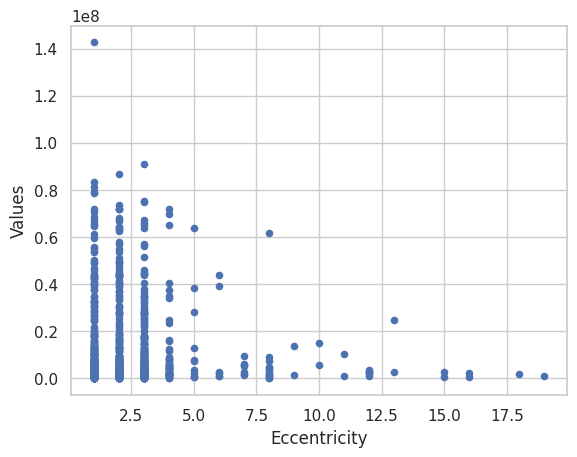

In [ ]:
df.plot.scatter(x='Eccentricity', y='Values')

Veamos cómo se relacionan las características de pegada y regate (y la aparición de jugadores con esas características)

<Axes: xlabel='Dribbling', ylabel='Kicking'>

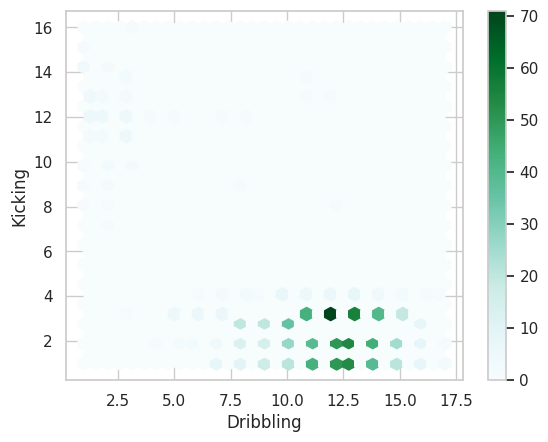

In [ ]:
df.plot.hexbin(x='Dribbling', y='Kicking', gridsize=30)

Generemos una visualización de características que esperamos en defensores

In [ ]:
df_defensor=df.groupby('DC').mean()[['Age', 'Aggressiion', 'Tackling', 'Composure', 'Command Of Area', 'One On Ones']]
df_defensor

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
df_defensor.plot.line()

In [ ]:
sns.FacetGrid(df,hue = 'Balance').map(plt.scatter,'Stamina','Acceleration').add_legend();
plt.show()

Vemos en el cuadro, como se esperaba, que los jugadores con más balance físico se concentran en los puntos más altos de aguante y aceleración.

## Recomendaciones preliminares






*  Tener una plantilla con jugadores con una edad de entre 25 y 30 años repercutirá en un mayor gasto en salarios.
*  Es muy difícil encontrar una oportunidad para invertir en promesas a bajo costo.
* La calidad actual y el pico esperado tampoco parecen mostrar oportunidades para inversión, por lo que, a priori, el análisis resulta más efectivo para buscar resultados deportivos y no económicos a corto plazo.
* Basándonos en búsqueda de resultados deportivos, llegaremos a éxito en la competencia y, en consecuencia, aumento en las ganancias.